In [12]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import shutil

### Record to be analyzed


In [55]:
smt_label = "20180709-121220"
train = False
epoch = 0
diag_dim = 32

In [56]:
if train:
    train_s = "train"
else:
    train_s = "test"
feature_zip = "../produced_data/{}/{}_{}.zip".format(smt_label, train_s, epoch)
robustness_folder = "../produced_data/{}/robustness_{}_{}/robustness_measures".format(smt_label, train_s, epoch)
out_folder = "../generated_plots/some_analysis"
if not os.path.exists(out_folder):
    os.makedirs(out_folder)

### Some analysis functions

In [83]:
def get_full_output_path(file_name):
    return os.path.join(out_folder, file_name)

def feature_value_hist(feature_values):
    for i in range(len(feature_values)):
        plt.figure()
        plt.xlabel("Feature {}".format(i))
        plt.ylabel("Count")
        plt.title("Value histogram for feature {}".format(i))
        plt.hist(feature_values[i], edgecolor="black")
        plt.savefig(os.path.join(out_folder, "{}_hist.pdf".format(i)))
        plt.close()
        
def feature_agreement(in_folder, feature_set, prefix, file_name, measure_name="ICC_A1"):
    # Retrieve computation dic
    plt.figure()
    comps = []
    comp_names = []
    for name in os.listdir(in_folder):
        if name.startswith(prefix) and name.endswith(".json"):
            dic = json.load(open(os.path.join(in_folder, name), 'r'))
            comps.append(dic)
            comp_names.append("_".join(name.split("_")[:-1]))
    
    all_values = []
    for comp, name in zip(comps, comp_names):
        values = []
        for f in feature_set:
            values.append(comp[f][measure_name])
        all_values.append(values)
    plt.hist(all_values, edgecolor="black", label=comp_names)
    plt.xlabel(measure_name)
    plt.ylabel("Number of features")
    plt.title("Feature reproducibility on test-retest pairs")
    plt.legend(loc=0, ncol=1)
    plt.tight_layout
    plt.show()
    oname = "{}_{}_{}.pdf".format(file_name, prefix, measure_name)
    plt.savefig(get_full_output_path(oname))
    plt.close()

### Load features

In [78]:
dest_path = "../produced_data/{}/{}_{}".format(smt_label, train_s, epoch)
shutil.unpack_archive(feature_zip, dest_path, 'zip')
features = []
for name in os.listdir(dest_path):
    f = np.load(os.path.join(dest_path, name))
    features.append(f)
features = np.array(features).T
shutil.rmtree(dest_path)

### Do analysis

In [79]:
feature_value_hist(features)

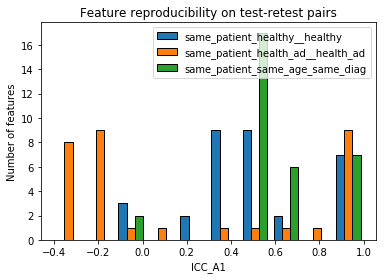

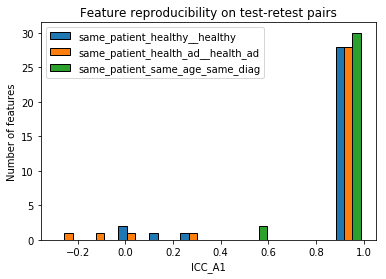

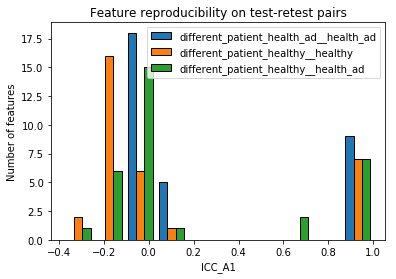

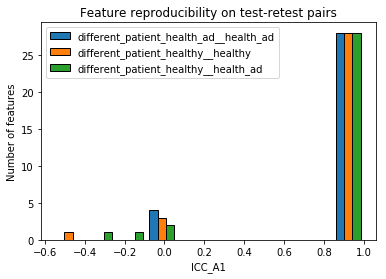

In [84]:
enc_dim = len(features)
not_reg = set([str(i) for i in range(0, enc_dim - diag_dim)])
reg = set([str(i) for i in range(enc_dim - diag_dim, enc_dim)])
feature_agreement(robustness_folder, not_reg, "same_patient", "not_reg")
feature_agreement(robustness_folder, reg, "same_patient", "reg")
feature_agreement(robustness_folder, not_reg, "different_patient", "not_reg")
feature_agreement(robustness_folder, reg, "different_patient", "reg")